In [54]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# How to use [SymPy](https://www.sympy.org) to solve equations

It can be difficult to create algebra and calculus solutions with symbolic math. For example if you want have an analytical equation to compare to a numerical equation. [SymPy](https://www.sympy.org) is a _symbolic Python_ library that allows you to create variables, rearrange equations, and do math operations (derivatives, integrals, Taylor series, etc.). 

In this notebook you will:

Consider the freefall kinematic equation, $x(t) = x_0 +v_0 t +\frac{a}{2}t^2$, then
1. define variables with `sympy`
2. create an equation
3. take a derivative of the function
3. [`lambdify`](https://docs.sympy.org/latest/tutorial/basic_operations.html#lambdify) the output and plot the maximum height vs initial speed of a baseball thrown upwards from 1 m

## 1. define variables with `sympy`

First, define some variables that you can use to define equations. Here, you create 4 variables:

1. time, $t$
1. acceleration, $a$
2. initial velocity, $v_0$
3. initial position, $x_0$

In [14]:
sympy.var('t, a, v_0, x_0')
print(type(t))

<class 'sympy.core.symbol.Symbol'>


The `type` of these variables are `sympy.core.symbol.Symbol`. This means SymPy will consider `t, a, v_0,` and `x_0` as symbolic objects, not floating point or integers.

## 2. create an equation

Now, you can use these variables to define the kinematic equation for a free falling object:

$x(t) = x_0 + v_0 t + \frac{a}{2}t^2$

In [16]:
x = x_0 +v_0*t +a/2*t**2
x

a*t**2/2 + t*v_0 + x_0

The output for a SymPy equation is a $\LaTeX$ equation. If you right-click on the equation you can "Show Math as TeX commands" If you want to copy into a Markdown cell or other location. 

output:
```latex
\displaystyle \frac{a t^{2}}{2} + t v_{0} + x_{0}
```

## 3. take a derivative of the function and fin the point when $v(t) = 0$

So far, you have defined the position, $x(t)$, as `x`. Now, you can take a derivative to get the velocity, $v(t) = \frac{dx}{dt}$:

In [22]:
v = x.diff(t)
v

a*t + v_0

The function, $\frac{dx}{dt}$, is now saved as the variable, `v`. You can solve for the time when $v(t) = 0$ using `sympy.solve`

In [33]:
sol = sympy.solve(v, t)
t_max_x = sol[0]
t_max_x

-v_0/a

The solution is that at $t = -\frac{v_0}{a}$, the velocity will be 0. Now, you can plug this into `x` to see what the solution at minimum speed will be.

In [34]:
max_x = x.subs(t, t_max_x)
max_x

x_0 - v_0**2/(2*a)

Considering a freefall example, when $x = 0$ the object will hit the ground. So you can solve for the time when $x=0$. _In this case you have 2 solutions because the equation is a quadratic._

In [40]:
t_ground = sympy.solve(x, t)
t_ground[0]

(-v_0 + sqrt(-2*a*x_0 + v_0**2))/a

In [41]:
t_ground[1]

-(v_0 + sqrt(-2*a*x_0 + v_0**2))/a

## 4. [`lambdify`](https://docs.sympy.org/latest/tutorial/basic_operations.html#lambdify) the output and plot the array

You now have symbolic functions that describe freefall motion:
- `x`: $x(t)$ the height of the object
- `v`: $v(t)$ the speed of the object
- `t_max_x`: the time when $v(t) = 0$
- `max_x`: the maximum height of the object
- `t_ground`: two solutions when $x(t) = 0$

Each of these SymPy variables are exact symbolic functions. Next, you will `lambdify` the functions so you can call them and create arrays to plot, compare, etc.
Start with `x` and create a function, `x_array`:

In [49]:
x_array = sympy.lambdify([t, a, v_0, x_0], x, 'numpy' )

The inputs for `x_array` are 
- `t`: time _can be single value or arrays
- `a`: acceleration _for freefall its $a = -9.81~m/s^2$_
- `v_0`: initial velocity
- `x_0`: initial position

Consider throwing a baseball upwards at $v_0=10~m/s$ from $x_0=1~m$. The maximum height will be at time `t_max_x`:

In [60]:
t_max_array = sympy.lambdify([a, v_0, x_0], t_max_x, 'numpy')

x0_baseball = 1
v0_baseball = 10
g = -9.81

t_max_baseball = t_max_array(g, v0_baseball, x0_baseball)
max_x_baseball = x_array(t_max_baseball, g, v0_baseball, x0_baseball)

print('max height of baseball will be at time = {:.3f} s, {:.3f} m high'.format(t_max_baseball, max_x_baseball))

max height of baseball will be at time = 1.019 s, 6.097 m high


Because you defined functions for `x_array` and `t_max_array`, you can input different values for `a`, `v_0`, and `x_0` to see the result. Here's an example of maximum height vs initial speed:

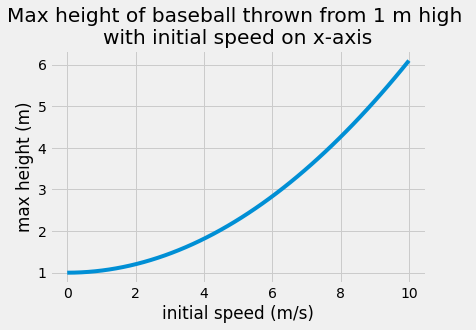

In [67]:
v0_baseball = np.linspace(0, 10)
t_max_baseball = t_max_array(g, v0_baseball, x0_baseball)
max_x_baseball = x_array(t_max_baseball, g, v0_baseball, x0_baseball)

plt.plot(v0_baseball, max_x_baseball)
plt.title('Max height of baseball thrown from {} m high \nwith initial speed on x-axis'.format(x0_baseball))
plt.xlabel('initial speed (m/s)')
plt.ylabel('max height (m)');